In [ ]:
from google.colab import files
uploded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
lablencoder = LabelEncoder()

In [ ]:
raw = pd.read_csv("IMDb Movies India.csv", encoding='latin1')
raw.head(6)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [ ]:
raw.shape

(15509, 10)

Data Cleaning


In [ ]:
raw.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
raw.duplicated().sum()

np.int64(6)

In [ ]:
raw.dropna(inplace=True)
raw.shape

(5659, 10)

In [ ]:
raw.fillna('Unknown', inplace=True)

In [ ]:
raw.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
raw.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
raw['Duration'] = raw['Duration'].astype(str).str.replace('min', '')
raw['Duration'] = pd.to_numeric(raw['Duration'], errors='coerce')
raw.fillna(raw['Duration'].mean(), inplace=True)

In [ ]:
# Convert the 'Votes' column back to string type before applying .str.replace()
raw['Votes'] = raw['Votes'].astype(str)
raw['Votes'] = pd.to_numeric(raw['Votes'].str.replace(',',''))

In [ ]:
ChangeToNum=LabelEncoder()
for feat in ['Name', 'Genre','Director','Actor 1', 'Actor 2', 'Actor 3','Year']:
  raw[feat]= lablencoder.fit_transform(raw[feat].astype(str))

In [ ]:
dr_a=raw.drop('Rating', axis=1)
rating_m= raw['Rating']
X_train, X_test, y_train, y_test = train_test_split(dr_a, rating_m, test_size=0.2, random_state=42)

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   int64  
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   int64  
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   int64  
 7   Actor 1   5659 non-null   int64  
 8   Actor 2   5659 non-null   int64  
 9   Actor 3   5659 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 486.3 KB


In [ ]:
mod = LinearRegression()
mod.fit(X_train, y_train)
pred= mod.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))

Mean Squared Error: 1.686147733993377
R2 Score: 0.0894270178724681


feature important

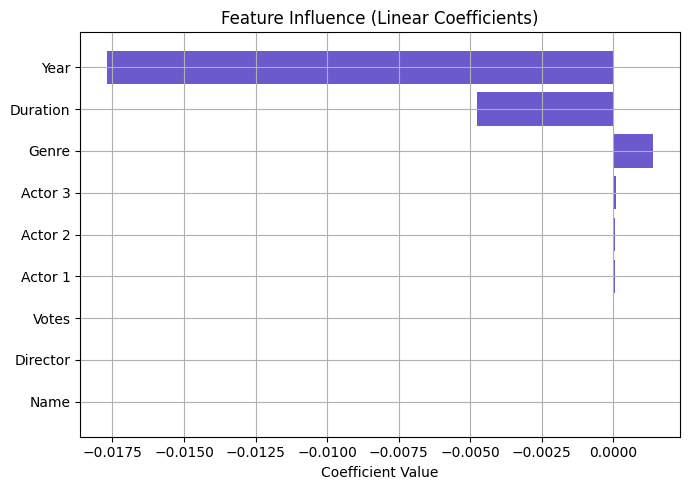

In [ ]:

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': mod.coef_
})

coef_df['Abs'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs', ascending=True)


plt.figure(figsize=(7,5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='slateblue')
plt.title("Feature Influence (Linear Coefficients)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

Result Visualization

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.6, color='tomato')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel("actual rating ")
plt.ylabel("predicted rating ")
plt.title("Actual vs. Predicted Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined